# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata,  on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_data_complete["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse = mouse_data_complete[(mouse_data_complete['Mouse ID'] == "g989")]
dup_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete_clean = mouse_data_complete[(mouse_data_complete["Mouse ID"]!= "g989")]
mouse_data_complete_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(mouse_data_complete_clean["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = mouse_data_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = mouse_data_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_volume_variance = mouse_data_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_volume_stdev = mouse_data_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_volume_sterr = mouse_data_complete_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                   'Median Tumor Volume': median_tumor_volume, 
                                   'Tumor Volume Variance': tumor_volume_variance,
                                   'Tumor Volume Std. Dev.': tumor_volume_stdev,
                                   'Tumor Volume Std. Err.': tumor_volume_sterr})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#First generate a dataframe in pandas with variables to plot on x and y axes
total_observed_timepoints = mouse_data_complete_clean.groupby(['Drug Regimen'])['Timepoint'].count()
regimen_and_timepoints = pd.DataFrame({'# of Observed Mouse Timepoints': total_observed_timepoints})
regimen_and_timepoints_descending = regimen_and_timepoints.sort_values(['# of Observed Mouse Timepoints'], ascending=False)
regimen_and_timepoints_descending


,# of Observed Mouse Timepoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


In [10]:
mouse_data_complete_clean['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

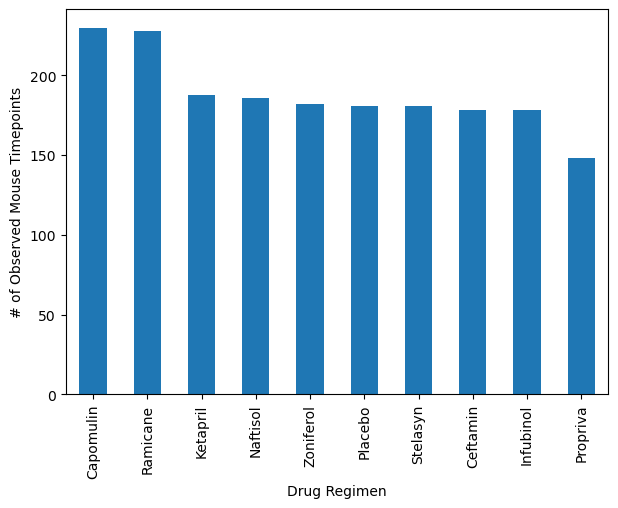

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_and_timepoints_descending.plot(kind="bar", figsize=(7,5), ylabel="# of Observed Mouse Timepoints", legend=False)
plt.show()
plt.tight_layout()



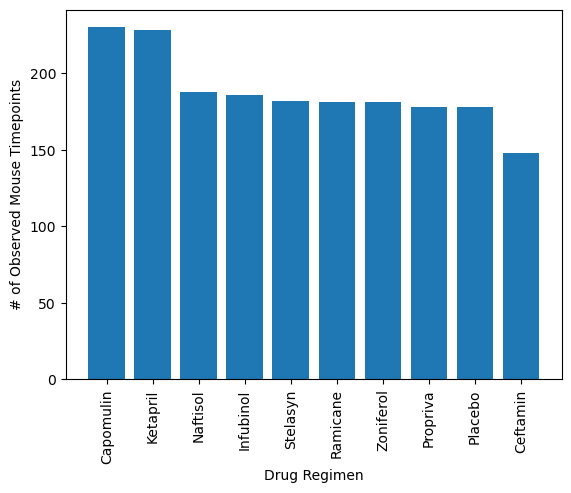

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_data_complete_clean["Drug Regimen"].unique()
total_observed_timepoints_descending = total_observed_timepoints.sort_values(ascending=False)
plt.bar(x_axis, total_observed_timepoints_descending, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()



In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_df = mouse_data_complete_clean.drop_duplicates(subset=['Mouse ID'])
unique_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [14]:
# Group the data frame by gender and count the results
female = unique_mice_df[(unique_mice_df['Sex']=="Female")]['Mouse ID'].count()
male = unique_mice_df[(unique_mice_df['Sex']=="Male")]['Mouse ID'].count()

count = pd.DataFrame({"count":[male, female]},
                    index=['Male', 'Female'])
count


,count
Male,125
Female,123


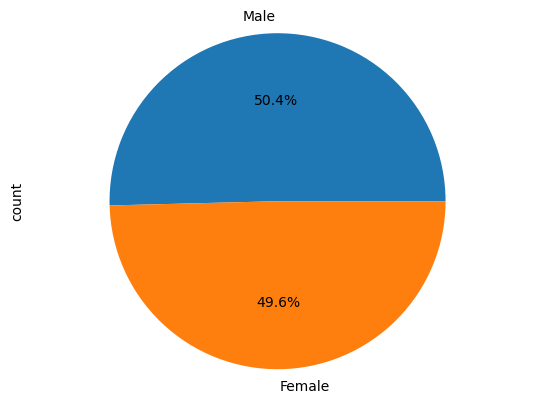

In [15]:
#Make the pie chart
male_female_pie = count.plot(kind="pie", y='count', legend=False, autopct='%1.1f%%')
male_female_pie.set_ylabel("count")
plt.axis("equal")
plt.show()

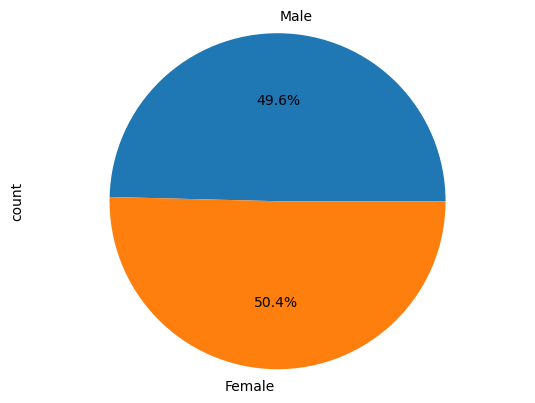

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
count_2 = unique_mice_df.groupby(['Sex'])["Mouse ID"].count()
pie_labels = ["Male", "Female"]

# Make the pie chart
plt.pie(count_2, autopct="%1.1f%%", labels=pie_labels)
plt.axis("equal")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = mouse_data_complete_clean.drop_duplicates(subset=['Mouse ID'], keep='last')
last_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [18]:
#Show cleaned dataframe to check last timepoint for at least 2 mouse IDs
mouse_data_complete_clean.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Separate mouse IDs for each regimen into dataframes: Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = last_timepoint[(last_timepoint['Drug Regimen'] == 'Capomulin')]
Ramicane = last_timepoint[(last_timepoint['Drug Regimen'] == 'Ramicane')]
Infubinol = last_timepoint[(last_timepoint['Drug Regimen'] == 'Infubinol')]
Ceftamin = last_timepoint[(last_timepoint['Drug Regimen'] == 'Ceftamin')]



In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting) 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # I accomplished this using the last_treatments dataframe created above.

Capomulin_vol = Capomulin['Tumor Volume (mm3)']
Ramicane_vol = Ramicane['Tumor Volume (mm3)']
Infubinol_vol = Infubinol['Tumor Volume (mm3)']
Ceftamin_vol = Ceftamin['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Determine outliers using upper and lower bounds for Capomulin
quartiles_Capomulin = Capomulin_vol.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin

print(f"The lower quartile of Capomulin is: {lowerq_Capomulin}")
print(f"The upper quartile of Capomulin is: {upperq_Capomulin}")
print(f"The interquartile range of Capomulin is: {iqr_Capomulin}")
print(f"The the median of Capomulin is: {quartiles_Capomulin[0.5]} ")

lower_bound_Capomulin = lowerq_Capomulin - (1.5*iqr_Capomulin)
upper_bound_Capomulin = upperq_Capomulin + (1.5*iqr_Capomulin)
print(f"Capomulin values below {lower_bound_Capomulin} could be outliers.")
print(f"Capomulin values above {upper_bound_Capomulin} could be outliers.")

    # Determine outliers using upper and lower bounds for Ramicane
quartiles_Ramicane = Ramicane_vol.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane

print(f"The lower quartile of Ramicane is: {lowerq_Ramicane}")
print(f"The upper quartile of Ramicane is: {upperq_Ramicane}")
print(f"The interquartile range of Ramicane is: {iqr_Ramicane}")
print(f"The the median of Ramicane is: {quartiles_Ramicane[0.5]} ")

lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)
print(f"Ramicane values below {lower_bound_Ramicane} could be outliers.")
print(f"Ramicane values above {upper_bound_Ramicane} could be outliers.")

 # Determine outliers using upper and lower bounds for Infubinol
quartiles_Infubinol = Infubinol_vol.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol

print(f"The lower quartile of Infubinol is: {lowerq_Infubinol}")
print(f"The upper quartile of Infubinol is: {upperq_Infubinol}")
print(f"The interquartile range of Infubinol is: {iqr_Infubinol}")
print(f"The the median of Infubinol is: {quartiles_Infubinol[0.5]} ")

lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)
print(f"Infubinol values below {lower_bound_Infubinol} could be outliers.")
print(f"Infubinol values above {upper_bound_Infubinol} could be outliers.")

 # Determine outliers using upper and lower bounds for Ceftamin
quartiles_Ceftamin = Ceftamin_vol.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin

print(f"The lower quartile of Ceftamin is: {lowerq_Ceftamin}")
print(f"The upper quartile of Ceftamin is: {upperq_Ceftamin}")
print(f"The interquartile range of Ceftamin is: {iqr_Ceftamin}")
print(f"The the median of Ceftamin is: {quartiles_Ceftamin[0.5]} ")

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)
print(f"Ceftamin values below {lower_bound_Ceftamin} could be outliers.")
print(f"Ceftamin values above {upper_bound_Ceftamin} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper q

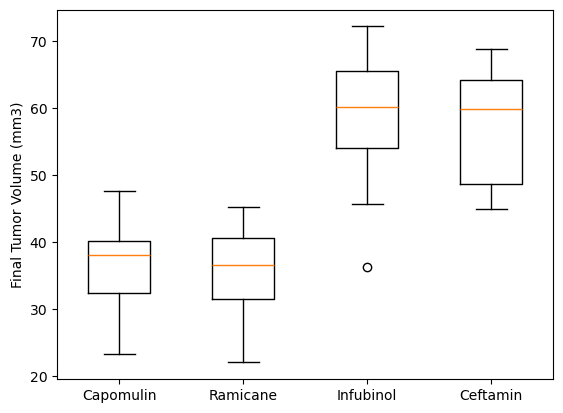

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([Capomulin_vol, Ramicane_vol, Infubinol_vol, Ceftamin_vol], widths=0.5, labels=treatments)
plt.show()


## Line and Scatter Plots

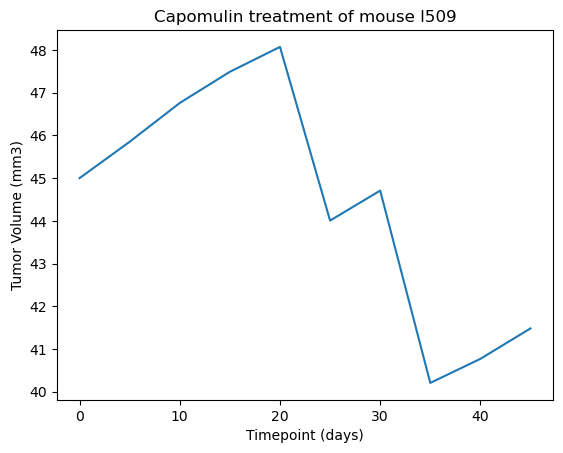

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = mouse_data_complete_clean[(mouse_data_complete_clean['Mouse ID'] == 'l509')]
mouse_timepoint = mouse_data["Timepoint"]
mouse_volume = mouse_data["Tumor Volume (mm3)"]
plt.plot(mouse_timepoint, mouse_volume)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# generate y-axis values (ave tumor volume on Capomulin regimen)
cap_mice = mouse_data_complete_clean[(mouse_data_complete_clean['Drug Regimen'] == "Capomulin")]
cap_ave_vol = cap_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Create dataframe to hold cap_ave_vol and weight (x-axis values) per Mouse ID
cap_ave_vol_df = pd.DataFrame({'Average Tumor Volume (mm3)':cap_ave_vol})

#Merge with unique_mice_df
merged_cap_data = pd.merge(unique_mice_df, cap_ave_vol_df,  on=["Mouse ID", "Mouse ID"])
merged_cap_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Average Tumor Volume (mm3)
0,b128,0,45.0,0,Capomulin,Female,9,22,41.963636
1,j246,0,45.0,0,Capomulin,Female,21,21,43.216925
2,r554,0,45.0,0,Capomulin,Female,8,17,36.509212
3,s185,0,45.0,0,Capomulin,Female,3,17,34.559143
4,b742,0,45.0,0,Capomulin,Male,7,21,40.083699
5,x401,0,45.0,0,Capomulin,Female,16,15,36.182040
6,l509,0,45.0,0,Capomulin,Male,17,21,44.434474
7,s710,0,45.0,0,Capomulin,Female,1,23,42.803733
8,r157,0,45.0,0,Capomulin,Male,22,25,45.798970
9,u364,0,45.0,0,Capomulin,Male,18,17,39.887495


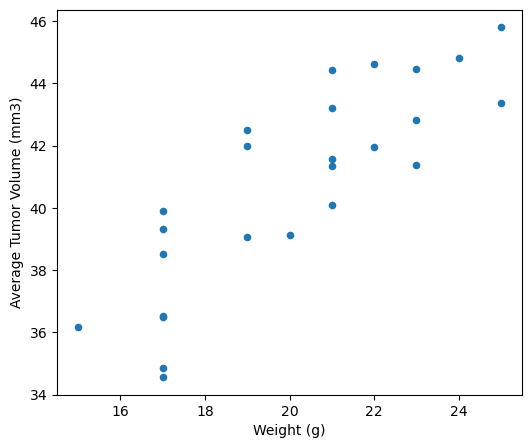

In [24]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
merged_cap_data.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,5))
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


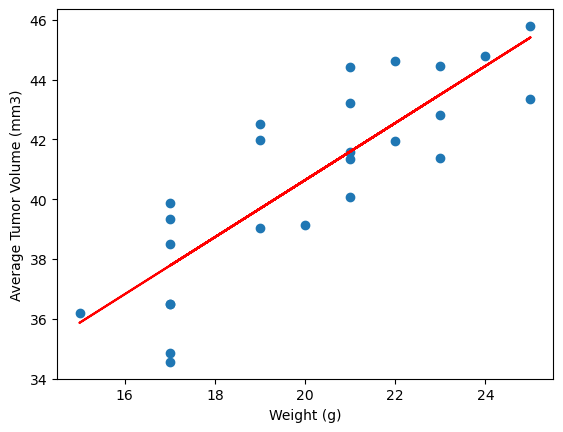

In [25]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = merged_cap_data.iloc[:,7]
tumor = merged_cap_data.iloc[:,8]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()